In [1]:
!pip install scikit-learn scikit-image matplotlib seaborn numpy

     ---------------------------------------- 8.9/8.9 MB 25.8 MB/s eta 0:00:00
  Using cached scikit_image-0.25.2-cp310-cp310-win_amd64.whl (12.8 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached scipy-1.15.3-cp310-cp310-win_amd64.whl (41.3 MB)
     ---------------------------------------- 308.4/308.4 kB ? eta 0:00:00
  Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
  Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
  Using cached tifffile-2025.5.10-py3-none-any.whl (226 kB)
  Using cached imageio-2.37.0-py3-none-any.whl (315 kB)
     --------------------------------------- 11.3/11.3 MB 38.4 MB/s eta 0:00:00
  Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Total de imágenes: 1288
Dimensiones de las imágenes: (50, 37)
Número de clases: 7
Dimensiones de las características HOG: (1288, 900)
Entrenando el modelo SVM...

Reporte de clasificación:
                   precision    recall  f1-score   support

     Ariel Sharon       0.79      0.85      0.81        13
     Colin Powell       0.87      1.00      0.93        60
  Donald Rumsfeld       0.95      0.78      0.86        27
    George W Bush       0.90      0.95      0.93       146
Gerhard Schroeder       0.88      0.84      0.86        25
      Hugo Chavez       0.82      0.60      0.69        15
       Tony Blair       0.93      0.72      0.81        36

         accuracy                           0.89       322
        macro avg       0.88      0.82      0.84       322
     weighted avg       0.89      0.89      0.89       322



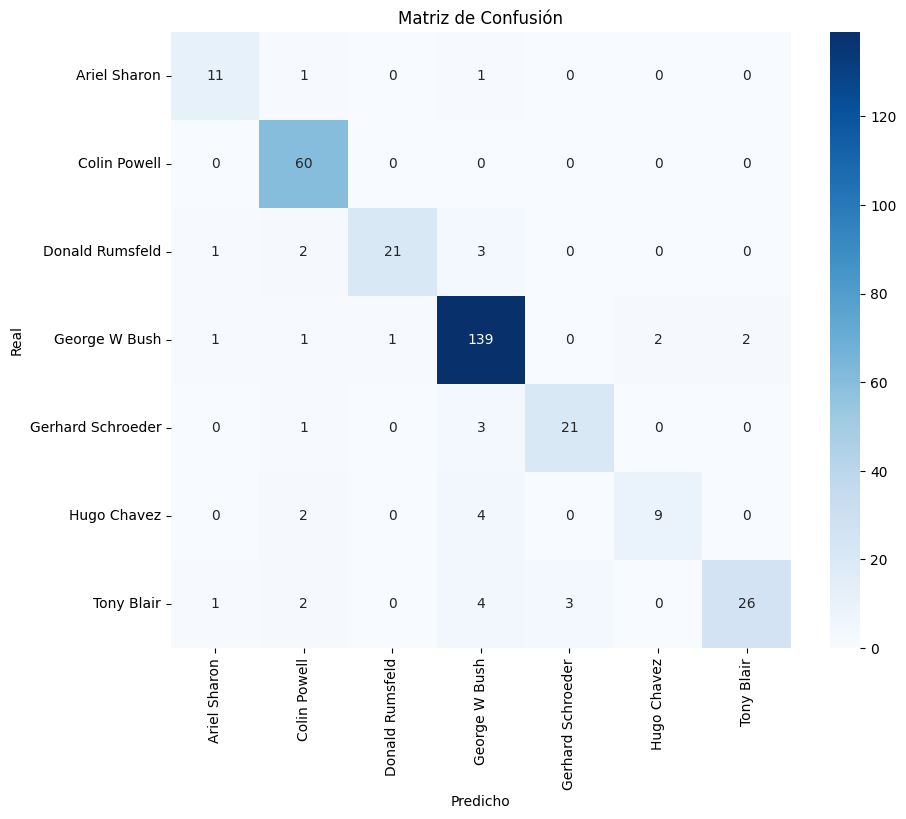

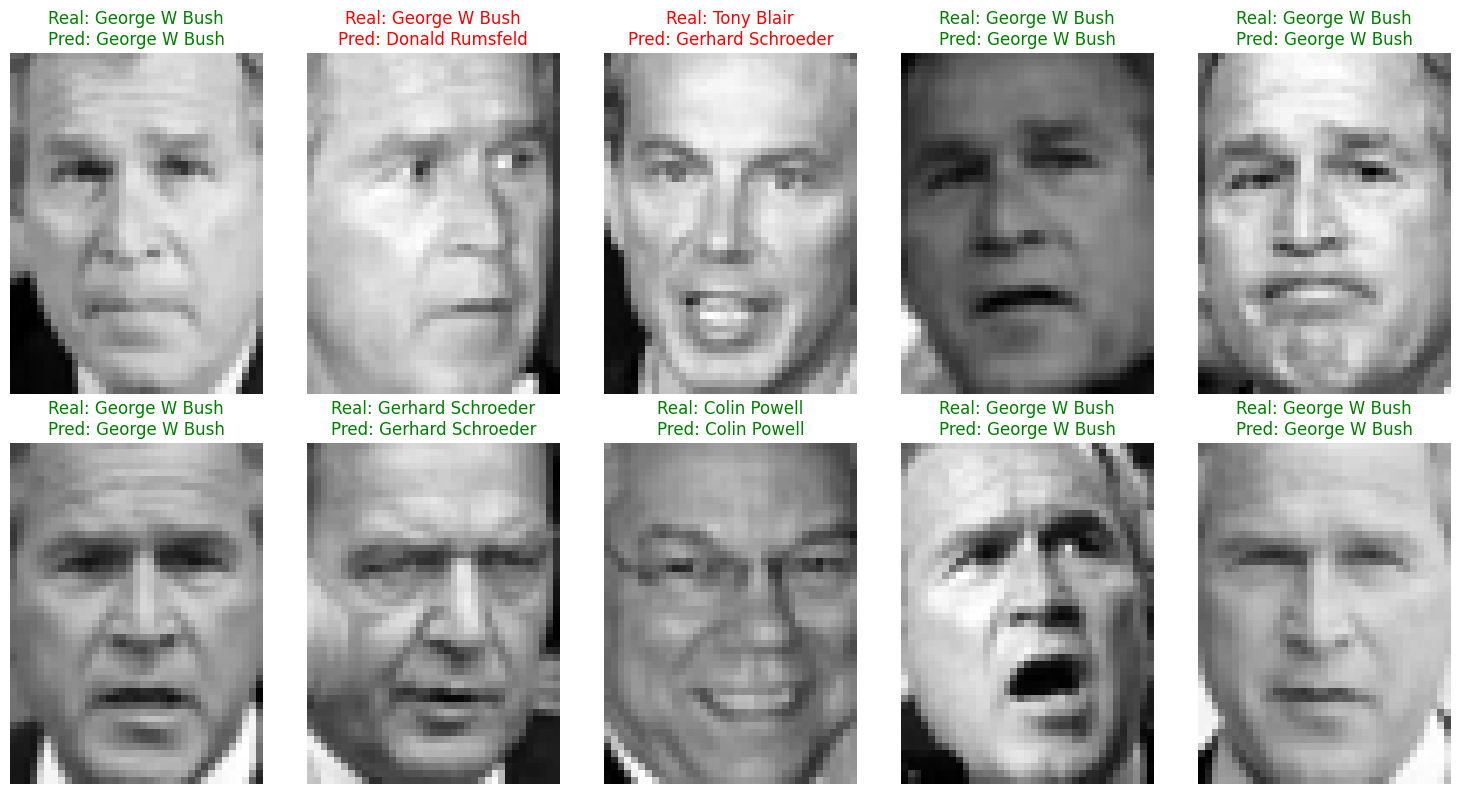

In [2]:
# Importar librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from skimage.feature import hog
from skimage.transform import resize
import seaborn as sns

# 1. Cargar el conjunto de datos LFW
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.images
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print(f"Total de imágenes: {X.shape[0]}")
print(f"Dimensiones de las imágenes: {X.shape[1:]}")
print(f"Número de clases: {n_classes}")

# 2. Preprocesamiento y extracción de características HOG
def extract_hog_features(images):
    hog_features = []
    for image in images:
        resized = resize(image, (50, 50))
        fd = hog(
            resized,
            orientations=9,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            block_norm='L2-Hys',
            visualize=False
        )
        hog_features.append(fd)
    return np.array(hog_features)

X_hog = extract_hog_features(X)
print(f"Dimensiones de las características HOG: {X_hog.shape}")

# 3. Dividir datos en entrenamiento y prueba (y guardar índices)
indices = np.arange(len(y))  # Creamos un array de índices [0, 1, 2, ..., 1287]
X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(
    X_hog, y, indices, test_size=0.25, random_state=42
)

# 4. Entrenar el clasificador SVM
print("Entrenando el modelo SVM...")
svm = SVC(kernel='rbf', class_weight='balanced', C=1000, gamma=0.005)
svm.fit(X_train, y_train)

# 5. Evaluar el modelo
y_pred = svm.predict(X_test)

# Reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names
)
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# 6. Visualizar algunas predicciones (CORREGIDO)
def plot_predictions(images, true_labels, pred_labels, target_names, n=10):
    plt.figure(figsize=(15, 8))
    for i in range(n):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        color = 'green' if true_labels[i] == pred_labels[i] else 'red'
        plt.title(
            f"Real: {target_names[true_labels[i]]}\nPred: {target_names[pred_labels[i]]}",
            color=color
        )
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Usamos idx_test para obtener las imágenes originales del conjunto de prueba
plot_predictions(
    X[idx_test[:10]],   # <-- CORREGIDO: Usamos índices reales
    y_test[:10], 
    y_pred[:10], 
    target_names
)